In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

In [2]:
df=pd.read_csv("Sample.csv",encoding='utf-8')
del df["Unnamed: 2"]
del df["Unnamed: 3"]

In [3]:
df.head()

,Time,L2P6(W)
0,1,316.6
1,2,292.8
2,3,297.5
3,4,245.3
4,5,256.4


In [4]:
x=[df['Time'][i] for i in df.index]
y=[df['L2P6(W)'][i] for i in df.index]

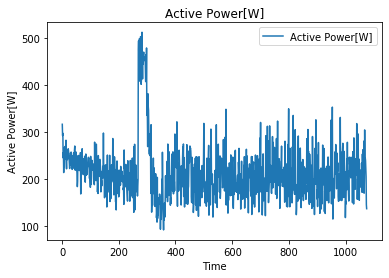

In [7]:
plt.plot(x,y)
plt.title("Active Power[W]")
plt.ylabel('Active Power[W]')
plt.xlabel('Time')
plt.legend(['Active Power[W]'], loc='upper right')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
y

[179.3,
 171.6,
 163.3,
 157.3,
 151.1,
 147.0,
 149.1,
 137.8,
 133.9,
 127.5,
 124.7,
 121.2,
 125.4,
 123.3,
 114.7,
 114.1,
 110.8,
 109.9,
 113.9,
 109.1,
 107.9,
 105.1,
 101.9,
 100.8,
 105.8,
 102.6,
 100.2,
 97.7,
 98.2,
 95.2]

In [48]:
x=[df['Material Additive Rate'][i] for i in range(30)]

In [49]:
x

[0.000495576,
 0.000537035,
 0.000575013,
 0.0006115319999999999,
 0.000646086,
 0.00067885,
 0.0007278419999999999,
 0.00078122,
 0.000833187,
 0.000881516,
 0.0009281760000000001,
 0.000967572,
 0.000947977,
 0.001012705,
 0.001074954,
 0.001135368,
 0.001187133,
 0.001238584,
 0.0011588689999999999,
 0.001234627,
 0.001308117,
 0.001379795,
 0.001432109,
 0.0014940670000000002,
 0.0013651929999999998,
 0.0014501170000000001,
 0.0015234279999999998,
 0.001596253,
 0.001665094,
 0.001725559]

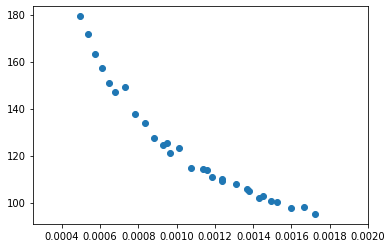

In [58]:
plt.figure()
plt.xlim(0.00025,0.002)
plt.scatter(x,y)

In [24]:
len(y)

32

In [39]:
for i in range(30):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
